#**Sentiment Classification**

Problem Statement: Classify the sentence into positive or negative sentiment






Data: Movie Reviews dataset from iMDB.


In [ ]:
pip install numpy pandas matplotlib seaborn nltk scikit-learn

##Importing the packages and Downloading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
# Load IMDb dataset using nltk
from nltk.corpus import movie_reviews


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')


# Create a DataFrame from the movie reviews
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

# Display first few rows
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


                                              review sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg


##Data Preprocessing

In [ ]:
# Data Cleaning
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    return ' '.join(words)

df['review'] = df['review'].apply(preprocess_text)

# Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})


In [ ]:
# Check unique values in 'sentiment' column
print(df['sentiment'].unique())

# Count occurrences of each category
print(df['sentiment'].value_counts())


[0 1]
sentiment
0    1000
1    1000
Name: count, dtype: int64


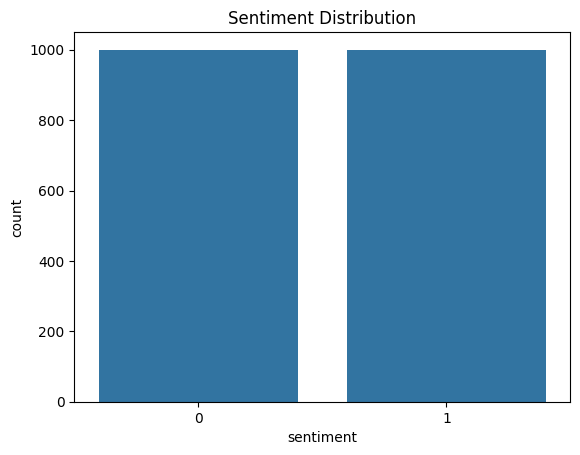

In [ ]:
# Sentiment distribution
sns.countplot(x='sentiment', data=df, hue_order=['positive', 'negative'])
plt.title('Sentiment Distribution')
plt.show()

##Splitting the data

In [ ]:
# Split data
X = df['review']
y = df['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Vectorize text data
'''vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)'''
#print(X_train_vec[0][0])

In [ ]:
#Try tf-idf with different n-grams

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)
#print(X_train_vec[0][0])
#print(X_val_vec.shape)
#print(X_test_vec.shape)

In [ ]:
# Train logistic regression model
#model = LogisticRegression(max_iter=1000)
#model.fit(X_train_vec, y_train)
#Train kNN classifier model
dt = LogisticRegression()
dt.fit(X_train_vec, y_train)

LogisticRegression()

##Evaluation

In [ ]:
# Validate the model
y_val_pred = dt.predict(X_val_vec)
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82       153
           1       0.79      0.86      0.83       147

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



In [ ]:
# Test the model
y_test_pred = dt.predict(X_test_vec)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       149
           1       0.83      0.80      0.82       151

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test_vec)[:, 1])
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.82
Confusion Matrix:
[[125  24]
 [ 30 121]]
ROC AUC: 0.8910173785501578


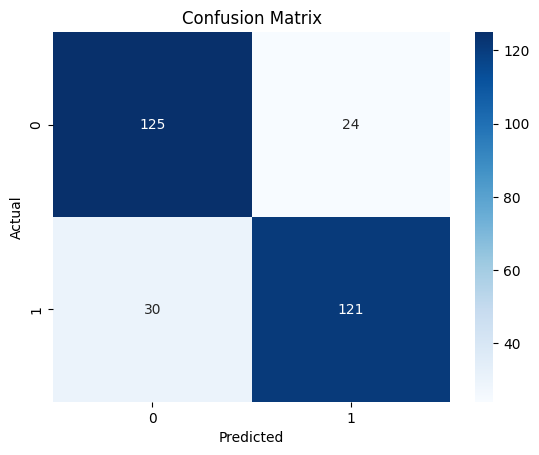

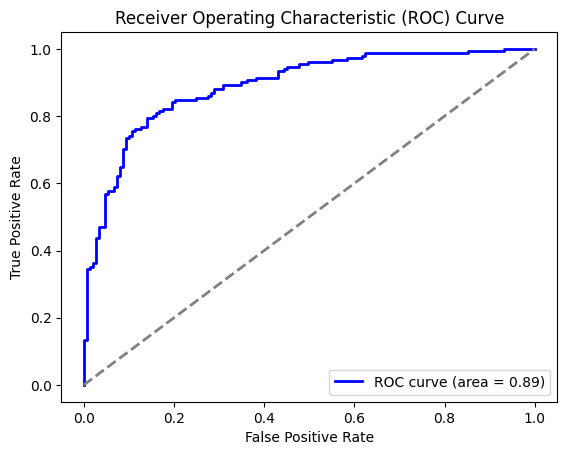

In [ ]:
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Analysis of misclassified examples


misclassified = X_test[y_test != y_test_pred]
print("Misclassified examples:")
print(misclassified.head())

Misclassified examples:
785     film touted exploring relationships black sexu...
978     anna king least fourth film adaptation margare...
309     one demanded david duchovny romantic comedy la...
1196    jay silent bob strike back kevin smith swan so...
1221    expand final fifteen minutes home alone film g...
Name: review, dtype: object


In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Get classifier coefficients
coefficients = classifier.coef_[0]

top_n = 10  # Number of top features to extract
top_positive_indices = np.argsort(coefficients)[-top_n:]
top_negative_indices = np.argsort(coefficients)[:top_n]

top_positive_features = [(feature_names[i], coefficients[i]) for i in top_positive_indices]
top_negative_features = [(feature_names[i], coefficients[i]) for i in top_negative_indices]

# Display top features for positive class
print(f"Top features for 'positive' class:")
for feature, coef in top_positive_features:
    print(f"  {feature}: {coef:.4f}")

# Display top features for negative class
print(f"Top features for 'negative' class:")
for feature, coef in top_negative_features:
    print(f"  {feature}: {coef:.4f}")

Top features for 'positive' class:
  perfectly: 0.9410
  performance: 0.9637
  excellent: 0.9656
  seen: 0.9729
  quite: 1.0128
  also: 1.0499
  well: 1.1504
  truman: 1.2030
  life: 1.5027
  great: 1.6573
Top features for 'negative' class:
  bad: -2.8954
  plot: -1.9252
  worst: -1.5159
  stupid: -1.3576
  nothing: -1.3313
  boring: -1.3298
  supposed: -1.2001
  movie: -1.1490
  unfortunately: -0.9871
  poor: -0.9704
